In [1]:
import sys
sys.path.append('/Users/gomez/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress

from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | opuwo
Processing Record 7 of Set 1 | makakilo city
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | cascais
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | gombong
Processing Record 13 of Set 1 | merauke
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | tiruvottiyur
City not found. Skipping...
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | oranjemund
Processing Record 22 of Set 1 | uaua
Processing R

Processing Record 39 of Set 4 | odessa
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | chicama
Processing Record 42 of Set 4 | chapais
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | elizabeth city
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | gwadar
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | hermanus
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | areia branca
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | nazas
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | sfantu gheorghe
Processing Record 8 of Set 5 | zlitan
Processing Record 9 of Set 5 | meulaboh
Processing Record 10 o

Processing Record 28 of Set 8 | mudanya
Processing Record 29 of Set 8 | eydhafushi
Processing Record 30 of Set 8 | ucluelet
Processing Record 31 of Set 8 | aquin
Processing Record 32 of Set 8 | prince rupert
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | zhangye
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | presidente prudente
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | wewak
Processing Record 40 of Set 8 | baiyin
Processing Record 41 of Set 8 | windhoek
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | charyshskoye
Processing Record 44 of Set 8 | skalat
Processing Record 45 of Set 8 | hobyo
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 | brza palanka
Processing Record 48 of Set 8 | bilma
Processing Record 49 of Set 8 | naze
Processing Record 50 of Set 8 | samala

Processing Record 16 of Set 12 | minas novas
Processing Record 17 of Set 12 | butzow
Processing Record 18 of Set 12 | salinas
Processing Record 19 of Set 12 | aksha
Processing Record 20 of Set 12 | pokaran
Processing Record 21 of Set 12 | ardakan
Processing Record 22 of Set 12 | balabac
Processing Record 23 of Set 12 | puerto del rosario
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | baruun-urt
Processing Record 26 of Set 12 | cheremukhovo
Processing Record 27 of Set 12 | richmond
Processing Record 28 of Set 12 | sangar
Processing Record 29 of Set 12 | agua blanca sur
Processing Record 30 of Set 12 | taltal
Processing Record 31 of Set 12 | oktyabrskiy
Processing Record 32 of Set 12 | beaufort
Processing Record 33 of Set 12 | tay ninh
Processing Record 34 of Set 12 | saint anthony
Processing Record 35 of Set 12 | isabela
Processing Record 36 of Set 12 | havoysund
Processing Record 37 of Set 12 | lakes entrance
Processing Record 38 of Set 12 | mandiana
Processing 

In [7]:
print(len(city_data))

567


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,84.97,72,43,10.13,MV,2020-06-23 12:13:24
1,Cherskiy,68.75,161.30,40.15,70,38,13.85,RU,2020-06-23 12:13:24
2,Mataura,-46.19,168.86,39.00,83,68,3.00,NZ,2020-06-23 12:13:24
3,Aykhal,66.00,111.50,78.80,22,42,11.18,RU,2020-06-23 12:13:25
4,Arraial Do Cabo,-22.97,-42.03,68.00,88,75,5.82,BR,2020-06-23 12:13:25
5,Opuwo,-18.06,13.84,77.47,18,0,15.10,NA,2020-06-23 12:13:25
6,Makakilo City,21.35,-158.09,75.20,78,40,4.70,US,2020-06-23 12:13:25
7,Busselton,-33.65,115.33,54.00,66,23,11.90,AU,2020-06-23 12:13:25
8,Rikitea,-23.12,-134.97,69.35,61,70,13.56,PF,2020-06-23 12:13:26
9,Cascais,38.70,-9.42,77.00,61,20,14.99,PT,2020-06-23 12:13:26


In [9]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2020-06-23 12:13:24,-0.60,73.08,84.97,72,43,10.13
1,Cherskiy,RU,2020-06-23 12:13:24,68.75,161.30,40.15,70,38,13.85
2,Mataura,NZ,2020-06-23 12:13:24,-46.19,168.86,39.00,83,68,3.00
3,Aykhal,RU,2020-06-23 12:13:25,66.00,111.50,78.80,22,42,11.18
4,Arraial Do Cabo,BR,2020-06-23 12:13:25,-22.97,-42.03,68.00,88,75,5.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
today = time.strftime("%x")
today

'06/23/20'

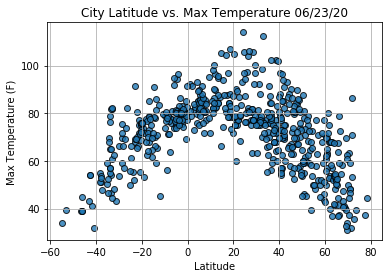

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

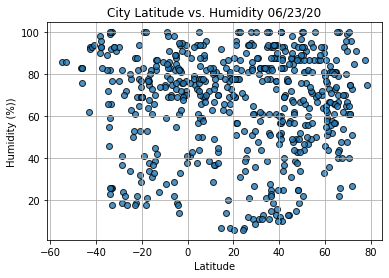

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

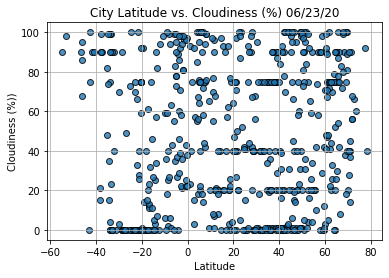

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

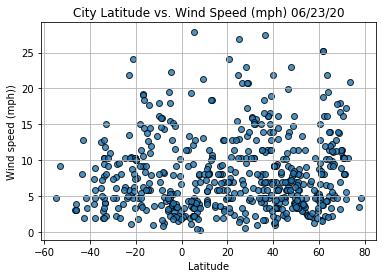

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cherskiy,RU,2020-06-23 12:13:24,68.75,161.30,40.15,70,38,13.85
3,Aykhal,RU,2020-06-23 12:13:25,66.00,111.50,78.80,22,42,11.18
6,Makakilo City,US,2020-06-23 12:13:25,21.35,-158.09,75.20,78,40,4.70
9,Cascais,PT,2020-06-23 12:13:26,38.70,-9.42,77.00,61,20,14.99
13,Upernavik,GL,2020-06-23 12:13:27,72.79,-56.15,35.71,85,66,10.36


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

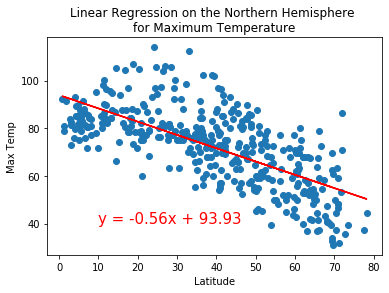

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

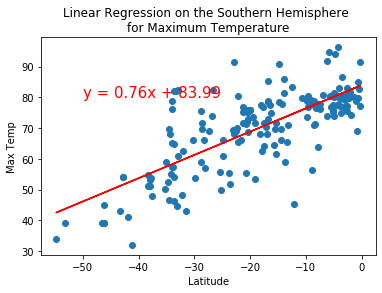

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,80))

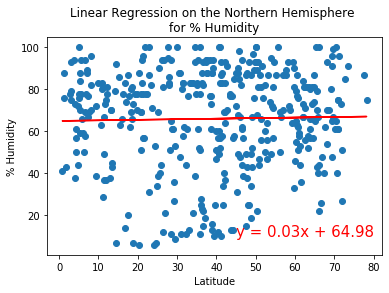

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity',(45,10))

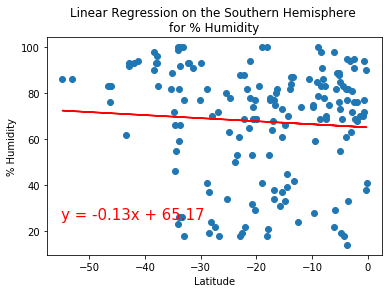

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-55,25))

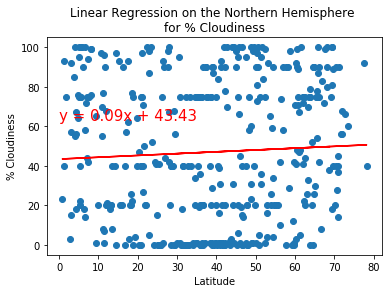

In [25]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(0,63))

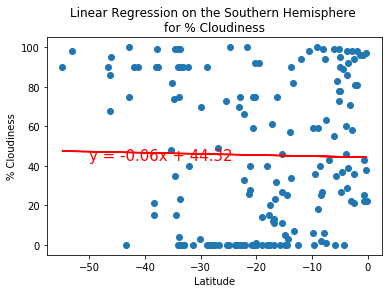

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-50,43))

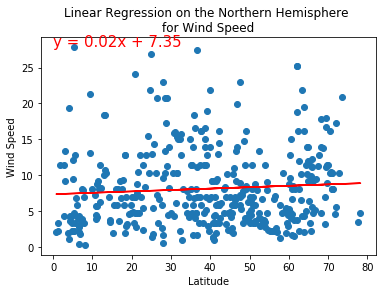

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed',(00,28))

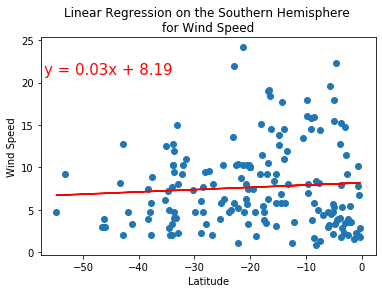

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed',
                       'Wind Speed',(-57,21))